In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
df = pd.read_csv("Ames_Housing_Final.csv")

In [15]:
df.head()

MS SubClass  Lot Frontage  Lot Area  Land Slope  Overall Qual  \
0           20         141.0     31770           2             6   
1           20          80.0     11622           2             5   
2           20          81.0     14267           2             6   
3           20          93.0     11160           2             7   
4           60          74.0     13830           2             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  ...  \
0             5        1960            1960         112.0           2  ...   
1             6        1961            1961           0.0           2  ...   
2             6        1958            1958         108.0           2  ...   
3             5        1968            1968           0.0           3  ...   
4             5        1997            1998           0.0           2  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0              1                       0                      0   
1              1                       0                      0   
2              1                       0                      0   
3              1                       0                      0   
4              1                       0                      0   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                      0                      1                       0  
1                      0                      1                       0  
2                      0                      1                       0  
3                      0                      1                       0  
4                      0                      1                       0  

[5 rows x 208 columns]

In [16]:
pd.options.display.max_rows = None

# Separating the target and features variable

In [17]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

#Sets target variable (Sale Price) as y
#Sets feature variables (everything but Sale Price and Id) as X

In [18]:
y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [19]:
X.head()

MS SubClass  Lot Frontage  Lot Area  Land Slope  Overall Qual  \
0           20         141.0     31770           2             6   
1           20          80.0     11622           2             5   
2           20          81.0     14267           2             6   
3           20          93.0     11160           2             7   
4           60          74.0     13830           2             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  ...  \
0             5        1960            1960         112.0           2  ...   
1             6        1961            1961           0.0           2  ...   
2             6        1958            1958         108.0           2  ...   
3             5        1968            1968           0.0           3  ...   
4             5        1997            1998           0.0           2  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0              1                       0                      0   
1              1                       0                      0   
2              1                       0                      0   
3              1                       0                      0   
4              1                       0                      0   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                      0                      1                       0  
1                      0                      1                       0  
2                      0                      1                       0  
3                      0                      1                       0  
4                      0                      1                       0  

[5 rows x 207 columns]

# Train | Test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 2469 to 1911
Columns: 207 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(11), int64(196)
memory usage: 3.2 MB


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1957 to 1915
Columns: 207 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(11), int64(196)
memory usage: 1.4 MB


# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
model.score(X_test, y_test)

#if we want to know our model is over fitting or underfitting

0.9099350170765165

In [25]:
model.score(X_train, y_train)

0.9367936196754023

In [26]:
test_predictions=model.predict(X_test)
test_predictions

array([128462.31596464,  89296.25263276, 321156.39739054, 155483.71943564,
       157014.45516873, 163192.04388898, 100963.11899015, 250018.7480116 ,
        94384.26817276,  94371.56874511, 181012.87382174, 145855.43322499,
       219173.57794652, 153949.20813854, 198824.00759878, 134633.16290683,
        29876.8383044 , 149132.82888695, 174270.47137801, 133522.91010265,
       162944.1837255 , 288646.15613411, 249040.63159721, 192513.50430841,
       181169.90246255, 203659.76247524, 343124.42656154, 195306.75006036,
       277245.53747219, 124285.72331331, 121215.88629036, 119015.8763206 ,
       129159.96833287, 166185.86097717,  83322.21015788, 148941.85349536,
       281757.47115717, 236613.31285604, 363766.03472921, 208813.09054059,
       114333.89205802, 202724.80591104, 141808.21124603,  84322.86478293,
       154714.48864474, 229628.7450187 , 221889.32076233, 169093.63815905,
       102486.86087304, 123771.03616236, 152621.95614259, 429111.31622691,
       181043.70594854,  

# RMSE

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [28]:
RMSE

23634.8016051568

In [29]:
df['SalePrice'].mean()
#compare mean with the original data

179875.34917355372

In [ ]:
RMSE/df['SalePrice'].mean()*100

# Residuals

In [30]:
test_predictions=model.predict(X_test)
test_res=y_test-test_predictions

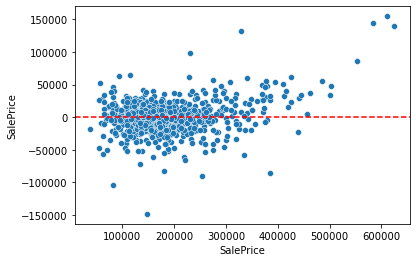

In [31]:
sns.scatterplot(x =y_test,y=test_res)
plt.axhline(y=0,color='r',linestyle ='--') 

In [32]:
len(test_res)

872

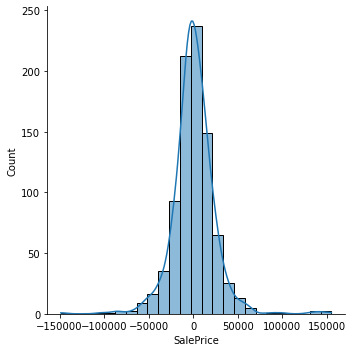

In [33]:
sns.displot(test_res,bins=25,kde=True)

# Probability Plot

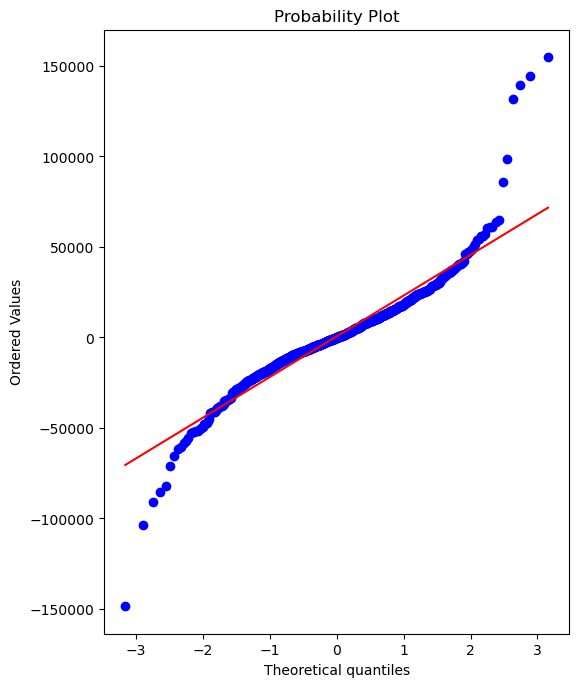

In [34]:
import scipy as sp

#create a figure and axis to plot on
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

#probplot returns the raw values if needed
#we just want to see the plot,so we assign these value to _
_ =sp.stats.probplot(test_res,plot=ax)